In [51]:
from scipy import datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

image = Image.open('./content/_static/raul-mucha.png')
img = np.asarray(image)

type(img)


numpy.ndarray

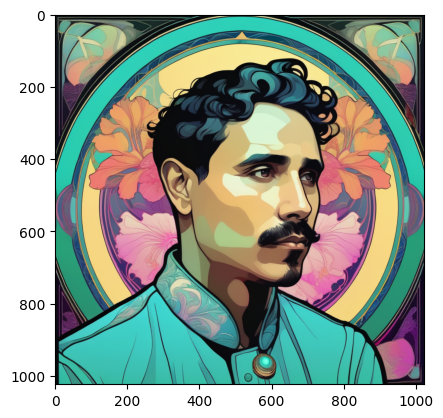

In [52]:
plt.imshow(img)
plt.show()

In [53]:
img.max(), img.min()
img.dtype

dtype('uint8')

In [54]:
img_scale = img/255
img_scale.dtype

dtype('float64')

In [55]:
red_array = img[:, :, 0]
green_array = img[:, :, 1]
blue_array = img[:, :, 2]

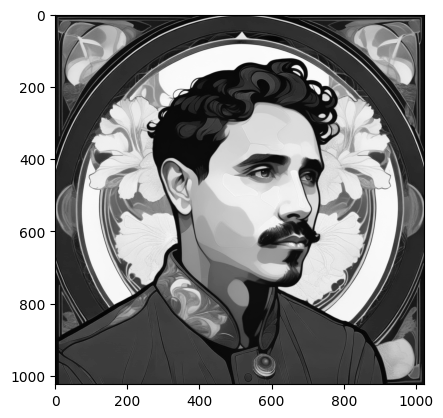

In [56]:
plt.imshow(red_array, cmap='grey')
plt.show()

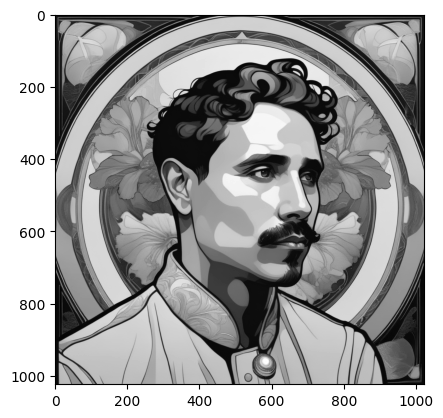

In [57]:
plt.imshow(green_array, cmap="grey")
plt.show()

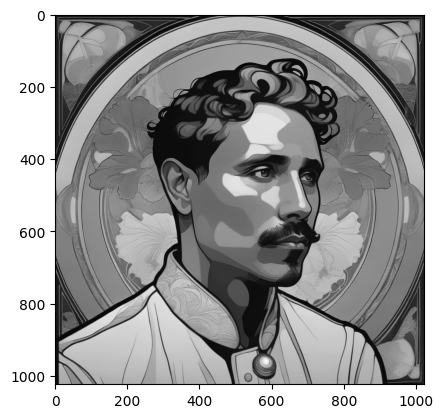

In [58]:
plt.imshow(blue_array, cmap="grey")
plt.show()

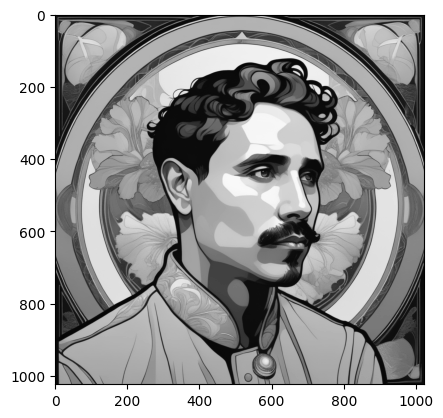

In [59]:
img_gray = img @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap="gray")
plt.show()

In [60]:
U, s, Vt = np.linalg.svd(img_gray)
U.shape, s.shape, Vt.shape

((1024, 1024), (1024,), (1024, 1024))

In [61]:
Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, s)

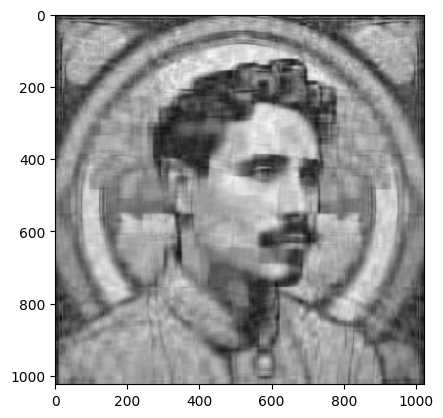

In [62]:
k=20
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")
plt.show()

In [63]:
img_array_transposed = np.transpose(img_scale, (2, 0, 1))
U, s, Vt = np.linalg.svd(img_array_transposed)
Sigma = np.zeros((s.shape[0],U.shape[2], Vt.shape[1]))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :]) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


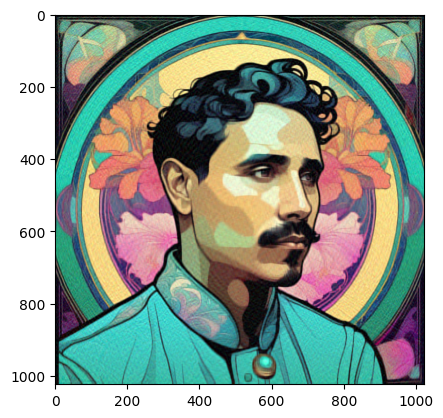

In [64]:
k=100
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]
plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()